In [0]:
# Import the machine learning libraries.
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

%matplotlib inline

In [0]:
advertising = pd.read_csv("./drive/My Drive/ML_Code/Linear Regression/tvmarketing.csv")

In [68]:
advertising.shape

(200, 2)

In [69]:
advertising.head(10)

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
5,8.7,7.2
6,57.5,11.8
7,120.2,13.2
8,8.6,4.8
9,199.8,10.6


In [70]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [71]:
advertising.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


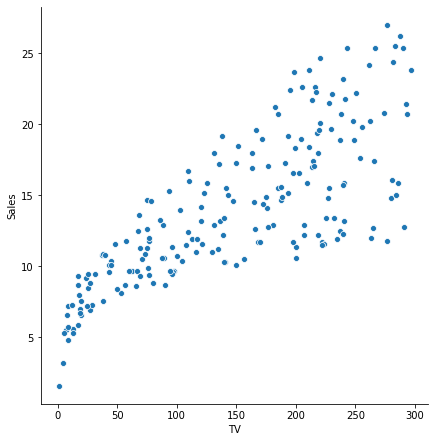

In [72]:
# Scatterplot the relationship between TV and Sales.
sns.pairplot(advertising, x_vars=['TV'], y_vars='Sales', size=6, kind='scatter')

In [73]:
# Put the feature (TV) variable into X.
X = advertising['TV']
X.head(10)

0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
5      8.7
6     57.5
7    120.2
8      8.6
9    199.8
Name: TV, dtype: float64

In [74]:
# Put the response (Sales) variable into y.
y = advertising['Sales']
y.head(10)

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
5     7.2
6    11.8
7    13.2
8     4.8
9    10.6
Name: Sales, dtype: float64

In [0]:
# Split the dataset into the training set and test subsets.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6 , random_state=0)

In [76]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(120,) (80,) (120,) (80,)


In [0]:
X_train = X_train[:, np.newaxis]
X_test = X_test[:, np.newaxis]

In [78]:
# LinearRegression
lr = LinearRegression()

# Fit the model
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [79]:
# Print the intercept and coefficients.
print(lr.intercept_)
print(lr.coef_)

7.194488785595947
[0.04613525]


In [0]:
# Make predictions on the testing set.
y_pred = lr.predict(X_test)

In [81]:
print(y_test.shape, y_pred.shape)

(80,) (80,)


In [82]:
r2_score = r2_score(y_test, y_pred)
print(r2_score)
print("r^2 on test data : %f" % r2_score)

0.688901987584994
r^2 on test data : 0.688902


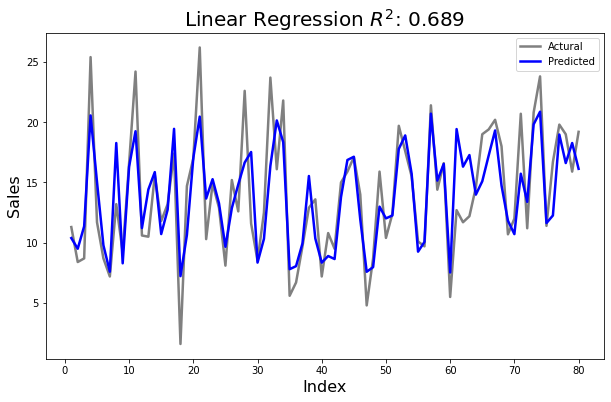

In [83]:
# Compute RMSE and R^2.
c = [i for i in range(1,81,1)]
fig = plt.figure(figsize=(10,6))
plt.plot(c, y_test, color="gray", linewidth=2.5, linestyle="-")
plt.plot(c, y_pred, color="blue",  linewidth=2.5, linestyle="-")
plt.title("Linear Regression $R^2$: %.3f" % (r2_score), fontsize=20)
plt.xlabel('Index', fontsize=16)
plt.ylabel('Sales', fontsize=16)
plt.legend(['Actural', 'Predicted'], loc='upper right')